In [ ]:
'''
Anomaly Detection
'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime

import zipfile
import io

In [2]:
archive = zipfile.ZipFile('walmart_cleaned.csv.zip', 'r')
txtdata = archive.read('walmart_cleaned.csv')
data = pd.read_csv(io.BytesIO(txtdata), encoding='cp1251')
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [ ]:
'''
Описание набора данных
'''

In [3]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,421570.000000,211611.321278,122195.149363,0.000000,105782.250000,211603.500000,317424.750000,423285.000000
Store,421570.000000,22.200546,12.785297,1.000000,11.000000,22.000000,33.000000,45.000000
IsHoliday,421570.000000,0.070358,0.255750,0.000000,0.000000,0.000000,0.000000,1.000000
Dept,421570.000000,44.260317,30.492054,1.000000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.000000,15981.258123,22711.183519,-4988.940000,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,421570.000000,60.090059,18.447931,-2.060000,46.680000,62.090000,74.280000,100.140000
Fuel_Price,421570.000000,3.361027,0.458515,2.472000,2.933000,3.452000,3.738000,4.468000
MarkDown1,421570.000000,2590.074819,6052.385934,0.000000,0.000000,0.000000,2809.050000,88646.760000
MarkDown2,421570.000000,879.974298,5084.538801,-265.760000,0.000000,0.000000,2.200000,104519.540000
MarkDown3,421570.000000,468.087665,5528.873453,-29.100000,0.000000,0.000000,4.540000,141630.610000


In [ ]:
'''
Типы данных
'''

In [4]:
pd.DataFrame(data.dtypes, columns=['Type']).T

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Type,int64,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64


In [ ]:
'''
Предварительная обработка данных
Преобразование столбца Date в формат Datetime
'''

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.week
data['DayOfTheWeek'] = data['Date'].dt.dayofweek
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [6]:
data.isna().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
DayOfTheWeek    0
Day             0
dtype: int64

In [ ]:
'''
Подмножества дата
'''

In [7]:
df = data[['Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']]

In [ ]:
'''
Установка даты в качестве индекса
'''

In [8]:
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IsHoliday     421570 non-null  int64  
 1   Dept          421570 non-null  float64
 2   Weekly_Sales  421570 non-null  float64
 3   Temperature   421570 non-null  float64
 4   Fuel_Price    421570 non-null  float64
 5   MarkDown1     421570 non-null  float64
 6   MarkDown2     421570 non-null  float64
 7   MarkDown3     421570 non-null  float64
 8   MarkDown4     421570 non-null  float64
 9   MarkDown5     421570 non-null  float64
 10  CPI           421570 non-null  float64
 11  Unemployment  421570 non-null  float64
 12  Type          421570 non-null  int64  
 13  Size          421570 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 48.2 MB


In [9]:
df.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [ ]:
'''
Обнаружение аномалий:
Обнаружение аномалий — это метод выявления редких событий или наблюдений, которые могут вызвать подозрения, поскольку статистически отличаются от остальных наблюдений. 
Такое «аномальное» поведение обычно приводит к какой-либо проблеме, например, мошенничеству с кредитными картами, сбою машины на сервере, кибератаке и т. д.
Аномалию можно в целом разделить на три категории:
Точечная аномалия: кортеж в наборе данных считается точечной аномалией, если он находится далеко от остальных данных.
Контекстная аномалия: наблюдение является контекстной аномалией, если оно является аномалией из-за контекста наблюдения.
Коллективная аномалия: набор экземпляров данных помогает в поиске аномалии.
Обнаружение аномалий можно выполнить с использованием концепций машинного обучения. Это можно сделать следующими способами –
Контролируемое обнаружение аномалий: этот метод требует маркированного набора данных, содержащего как нормальные, так и аномальные образцы, для построения предиктивной модели 
для классификации будущих точек данных. 
Наиболее часто используемые алгоритмы для этой цели – контролируемые нейронные сети, опорные векторные машинные обучения, классификатор K-ближайших соседей и т. д.
Неконтролируемое обнаружение аномалий: этот метод не требует никаких обучающих данных и вместо этого предполагает две вещи о данных, 
а именно: только небольшой процент данных является аномальным и любая аномалия статистически отличается от нормальных образцов. 
Основываясь на приведенных выше предположениях, данные затем кластеризуются с использованием меры сходства, и точки данных, которые находятся далеко от кластера, считаются аномалиями.
'''

In [ ]:
'''
Подходящие базовые модели

Соответствие модели KNN
'''

In [10]:
from sklearn.neighbors import NearestNeighbors

X = df.values

# создадим экземпляр модели
nbrs = NearestNeighbors(n_neighbors = 3)
# fit модель
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

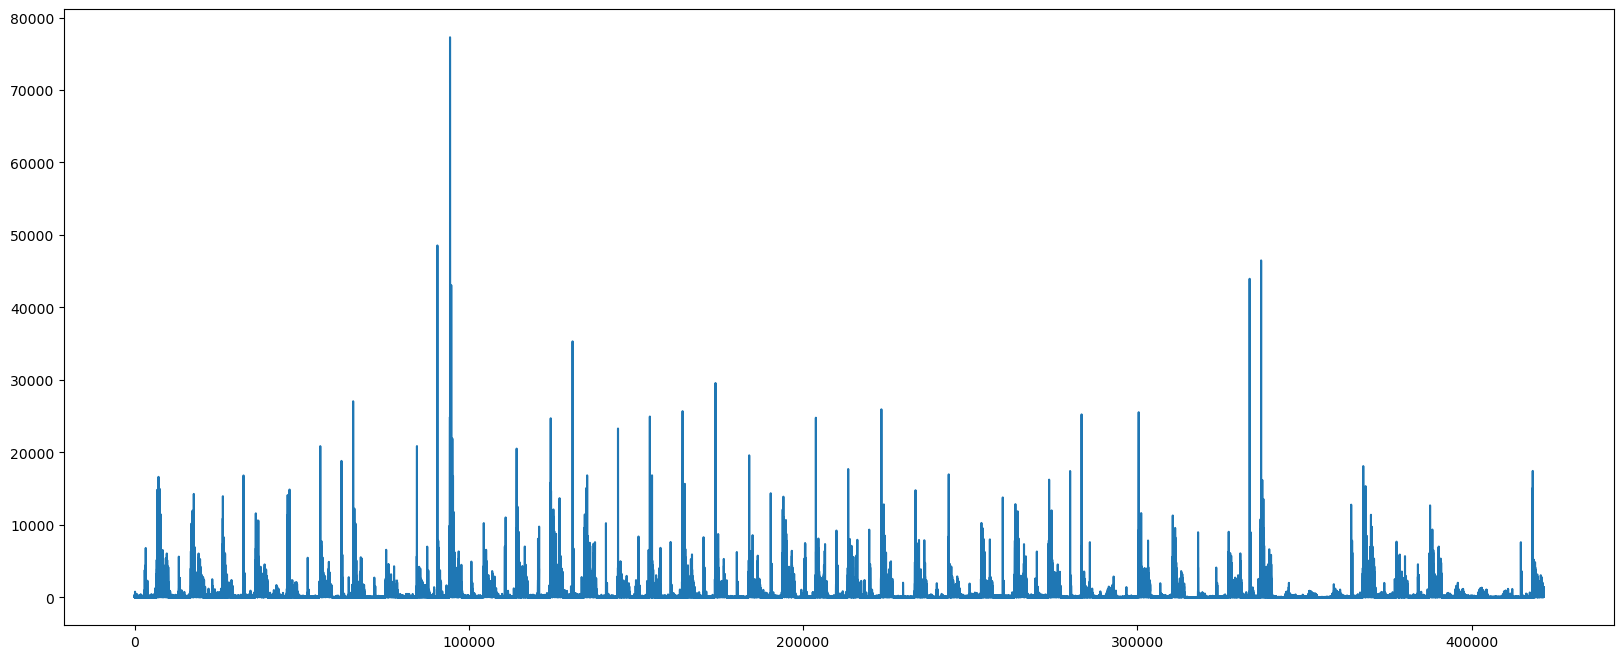

In [11]:
# расстояния и индексы k-neighbor из выходных данных модели

distances, indexes = nbrs.kneighbors(X)

# построим график среднего значения k-расстояний для каждого наблюдения

plt.figure(figsize=(20,8))
plt.plot(distances.mean(axis =1))

In [12]:
# визуально определим пороговые значения больше 35000
outlier_index = np.where(distances.mean(axis = 1) > 35000)

# фильтруем выбросы значений
outlier_values = data.iloc[outlier_index]
outlier_values

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day
90609,90960,10,2010-11-26,1,72.0,693099.36,55.33,3.162,0.00,0.00,...,0.00,126.669267,9.003,2,126512,2010,11,47,4,26
94385,94736,10,2011-11-25,1,72.0,630999.19,60.68,3.760,174.72,329.00,...,1009.98,129.836400,7.874,2,126512,2011,11,47,4,25
94743,95094,10,2011-12-30,1,72.0,156431.46,48.92,3.428,7676.36,104519.54,...,3732.93,130.071032,7.874,2,126512,2011,12,52,4,30
131045,131552,14,2010-11-26,1,72.0,474330.10,46.15,3.039,0.00,0.00,...,0.00,182.783277,8.724,3,200898,2010,11,47,4,26
333606,334932,35,2010-11-26,1,72.0,627962.93,46.67,3.039,0.00,0.00,...,0.00,136.689571,8.763,2,103681,2010,11,47,4,26
337045,338371,35,2011-11-25,1,72.0,649770.18,47.88,3.492,1333.24,0.00,...,6386.86,140.421786,8.745,2,103681,2011,11,47,4,25


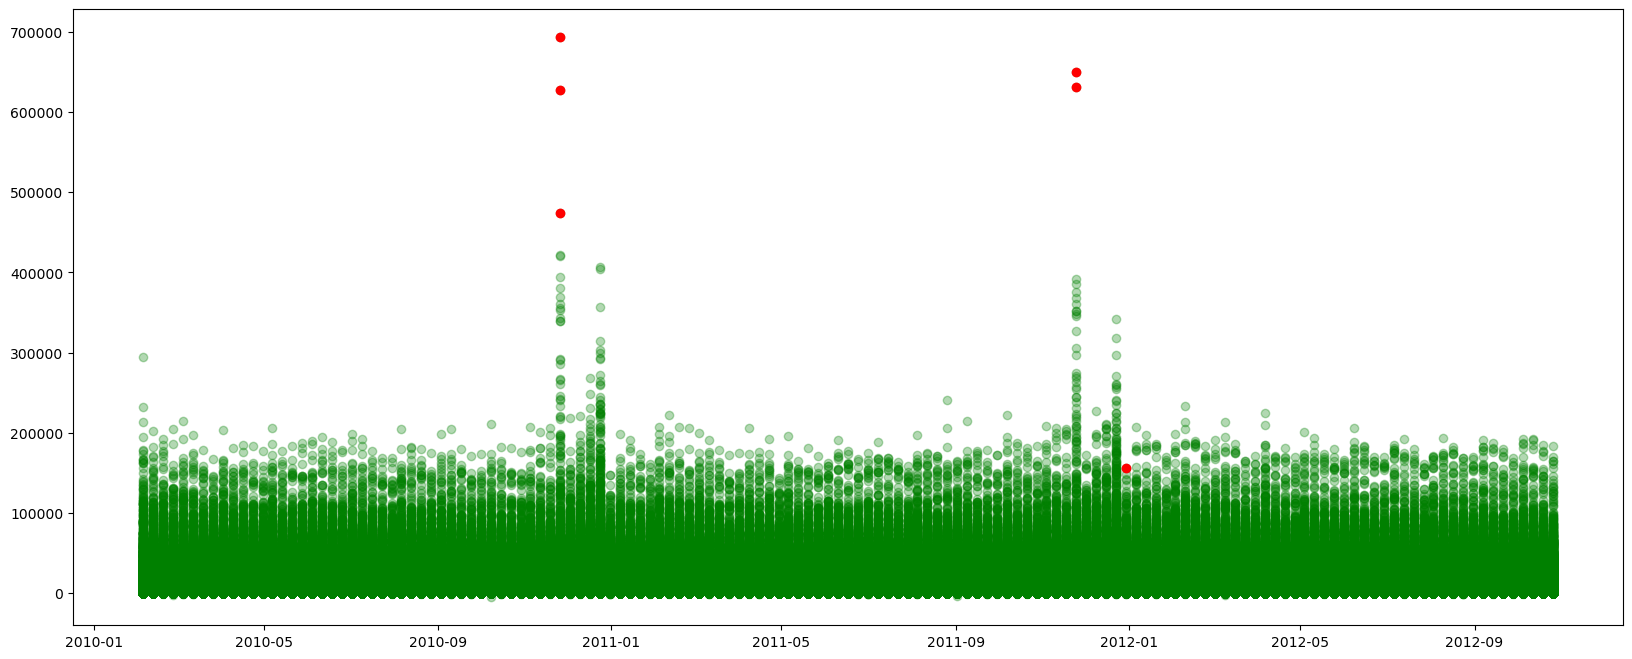

In [13]:
plt.figure(figsize=(20,8))
plt.scatter(df.index,df["Weekly_Sales"] ,color = "g",alpha=0.3)

otlr_val = df.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color = "r")

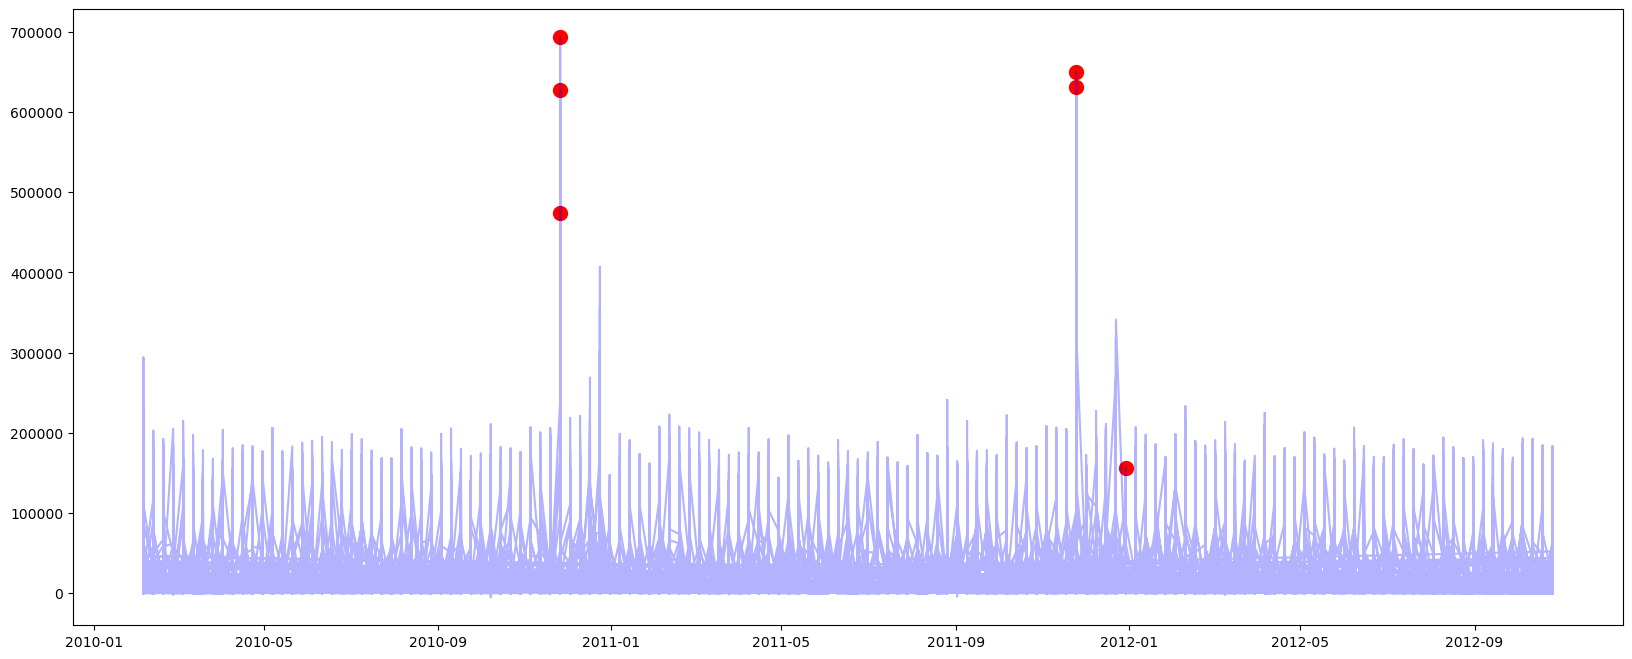

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df.index,df["Weekly_Sales"] ,color = "b",alpha = 0.3)

plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color='r',linewidths=5)

In [ ]:
'''
Обнаружение аномалий с использованием Леса Изоляции
'''

In [15]:
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=1.0)
model.fit(df[["Weekly_Sales"]])

IsolationForest(contamination=0.2, n_estimators=1000)

In [16]:
df2 = df.copy()

df2['scores']=model.decision_function(df2[['Weekly_Sales']])
df2['anomaly']=model.predict(df[['Weekly_Sales']])
df2.head(20)

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,scores,anomaly
Date,,,,,,,,,,,,,,,,
2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.001793,1
2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.044193,1
2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.039524,1
2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.066815,1
2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.055879,1
2010-02-05,0,79.0,46729.77,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,-0.053011,-1
2010-02-05,0,55.0,21249.31,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.013434,1
2010-02-05,0,5.0,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,-0.013492,-1
2010-02-05,0,58.0,7659.97,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.057556,1


In [17]:
df2[df2['anomaly'] == -1]

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,scores,anomaly
Date,,,,,,,,,,,,,,,,
2010-02-05,0,79.0,46729.77,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.053011,-1
2010-02-05,0,5.0,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.013492,-1
2010-02-05,0,87.0,35972.49,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.024206,-1
2010-02-05,0,38.0,115564.35,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.254079,-1
2010-02-05,0,93.0,64494.87,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.104648,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0,2.0,36074.86,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.024025,-1
2012-10-26,0,95.0,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.083460,-1
2012-10-26,0,1.0,27117.16,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.004148,-1


In [18]:
# Процент выбросов

df2[df2['anomaly']== -1].shape[0]/df.shape[0]*100

19.991223284389307

In [19]:
df3 = df.copy()

In [20]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=14)
model.fit(df)

IsolationForest(contamination=0.2, max_features=14, n_estimators=1000)

In [21]:
df3['scores']=model.decision_function(df)
df3['anomaly']=model.predict(df)
df3.head(20)

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,scores,anomaly
Date,,,,,,,,,,,,,,,,
2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.049539,1
2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.069349,1
2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.066907,1
2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.065464,1
2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.068683,1
2010-02-05,0,79.0,46729.77,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.043419,1
2010-02-05,0,55.0,21249.31,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.062110,1
2010-02-05,0,5.0,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.051321,1
2010-02-05,0,58.0,7659.97,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0.063873,1


In [22]:
df3[df3['anomaly'] == -1]

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,scores,anomaly
Date,,,,,,,,,,,,,,,,
2010-02-05,0,38.0,115564.35,42.31,2.572,0.0,0.00,0.00,0.00,0.0,211.096358,8.106,3,151315,-0.002171,-1
2010-02-05,0,95.0,106690.06,42.31,2.572,0.0,0.00,0.00,0.00,0.0,211.096358,8.106,3,151315,-0.007897,-1
2010-02-05,0,92.0,139884.94,42.31,2.572,0.0,0.00,0.00,0.00,0.0,211.096358,8.106,3,151315,-0.023537,-1
2010-02-12,1,3.0,10887.84,38.51,2.548,0.0,0.00,0.00,0.00,0.0,211.242170,8.106,3,151315,-0.019169,-1
2010-02-12,1,79.0,36080.86,38.51,2.548,0.0,0.00,0.00,0.00,0.0,211.242170,8.106,3,151315,-0.030129,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-21,0,94.0,5008.65,65.32,4.038,8452.2,92.28,63.24,2376.38,8670.4,191.856704,8.684,2,118221,-0.008548,-1
2012-09-21,0,83.0,714.42,65.32,4.038,8452.2,92.28,63.24,2376.38,8670.4,191.856704,8.684,2,118221,-0.004994,-1
2012-09-21,0,82.0,11093.46,65.32,4.038,8452.2,92.28,63.24,2376.38,8670.4,191.856704,8.684,2,118221,-0.003193,-1


In [23]:
df3[df3['anomaly'] == -1].shape[0]/df.shape[0]*100

20.0

In [ ]:
'''
Обнаружение аномалий с помощью DBSCAN
'''

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
X = df.values

dbscan = DBSCAN(eps = 1000, min_samples= 4)
# dbscan = DBSCAN(eps = 10000, min_samples= 10)

db_model = dbscan.fit(X)

labels = db_model.labels_

In [26]:
len(labels)

421570

In [27]:
np.unique(labels)

array([  -1,    0,    1, ..., 5894, 5895, 5896], dtype=int64)

In [28]:
pd.value_counts(labels)

 186     52352
 4875    41083
-1       38479
 450     12830
 1032    12671
         ...  
 5221        3
 5222        3
 229         3
 2123        3
 653         3
Length: 5898, dtype: int64

In [29]:
df[labels == -1]

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2010-02-12,1,92.0,143081.42,38.51,2.548,0.00,0.00,0.0,0.00,0.00,211.242170,8.106,3,151315
2010-02-26,0,95.0,103652.58,46.63,2.561,0.00,0.00,0.0,0.00,0.00,211.319643,8.106,3,151315
2010-11-19,0,92.0,157621.22,51.41,2.771,0.00,0.00,0.0,0.00,0.00,211.889674,7.838,3,151315
2010-11-26,1,72.0,196810.42,64.52,2.735,0.00,0.00,0.0,0.00,0.00,211.748433,7.838,3,151315
2010-11-26,1,92.0,170904.79,64.52,2.735,0.00,0.00,0.0,0.00,0.00,211.748433,7.838,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0,23.0,19992.29,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,0,1.0,27117.16,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,0,38.0,47799.07,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [30]:
sum(labels == -1)/df.shape[0]*100

9.127547026591076

In [ ]:
'''
Isolation Forest и K Nearest Neighbors показывают примерно одинаковый процент выбросов 20.0 и 19.99.
DBSCAN дает 9.13, что существенно меньше. 
Для решения о принятия той или иной модели необходима дополнительная информация.
'''